<a href="https://colab.research.google.com/github/19991/Pulsar_Classification_For_Class_Prediction/blob/main/Pulsar_Classification_For_Class_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

## About Dataset
Pulsar Classification For Class Prediction
17898 entries

Data can be useful for prediction models of classification.

COLUMNS:
Based on Integrated Profile of Observation

Mean_Integrated: Mean of Observations

SD: Standard deviation of Observations

EK: Excess kurtosis of Observations

Skewness: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.

Mean _ DMSNR _ Curve: Mean of DM SNR CURVE of Observations

SD _ DMSNR _ Curve: Standard deviation of DM SNR CURVE of Observations

EK _ DMSNR _ Curve: Excess kurtosis of DM SNR CURVE of Observations

Skewness _ DMSNR _ Curve: Skewness of DM SNR CURVE of Observations

Class: Class 0 - 1

In [ ]:
train_df = pd.read_csv("train.csv",index_col="id")
original_df = pd.read_csv("Pulsar.csv")
test_df = pd.read_csv("test.csv",index_col="id")

In [ ]:
train_df["flag"] = 1
print(train_df.shape)
train_df.head()

(51085, 10)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
id,,,,,,,,,,
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0.0,1
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0.0,1
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0.0,1
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0.0,1
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0.0,1


In [ ]:
original_df["flag"] = 0
print(original_df.shape)
original_df.head()

(17898, 10)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,0


In [ ]:
test_df["flag"] = 1
print(test_df.shape)
test_df.head()

(51481, 9)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,flag
id,,,,,,,,,
117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781,1
117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822,1
117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499,1
117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240,1
117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775,1


In [ ]:
train_df = pd.concat([train_df,original_df])
train_df = train_df.reset_index(drop=True)

In [ ]:
train_df = train_df.dropna()
train_df.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
flag                    0
dtype: int64

In [ ]:
train_df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
count,122676.000000,122676.000000,122676.000000,122676.000000,122676.000000,122676.000000,122676.000000,122676.000000,122676.000000,122676.000000
mean,111.187037,46.625534,0.487606,1.815849,12.334835,26.265093,8.193899,100.293643,0.092039,0.416414
std,25.327585,6.548663,1.090244,6.317090,28.344638,19.709742,4.243024,96.446109,0.289082,0.492966
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000,0.000000
25%,102.515625,42.833320,0.038520,-0.188747,2.005853,14.723978,6.166605,40.310926,0.000000,0.000000
50%,115.804688,47.149529,0.208864,0.149581,2.805184,18.348852,8.432852,83.228569,0.000000,0.000000
75%,126.718750,50.930013,0.442341,0.817256,4.871237,26.750629,10.412449,131.094516,0.000000,1.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000,1.000000


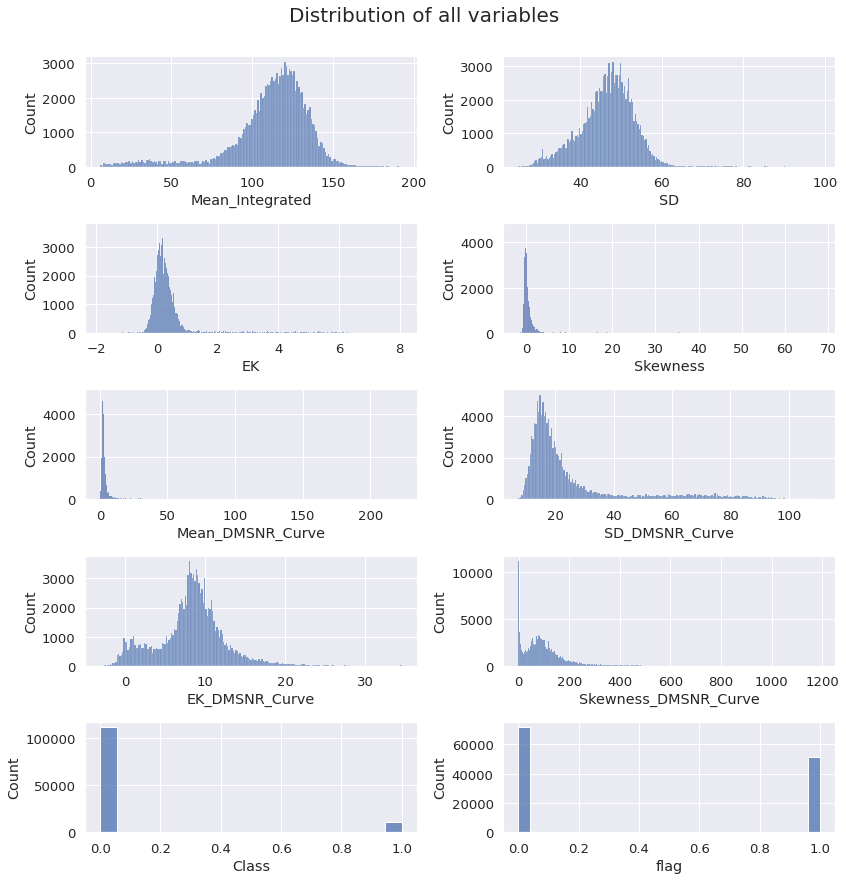

In [ ]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

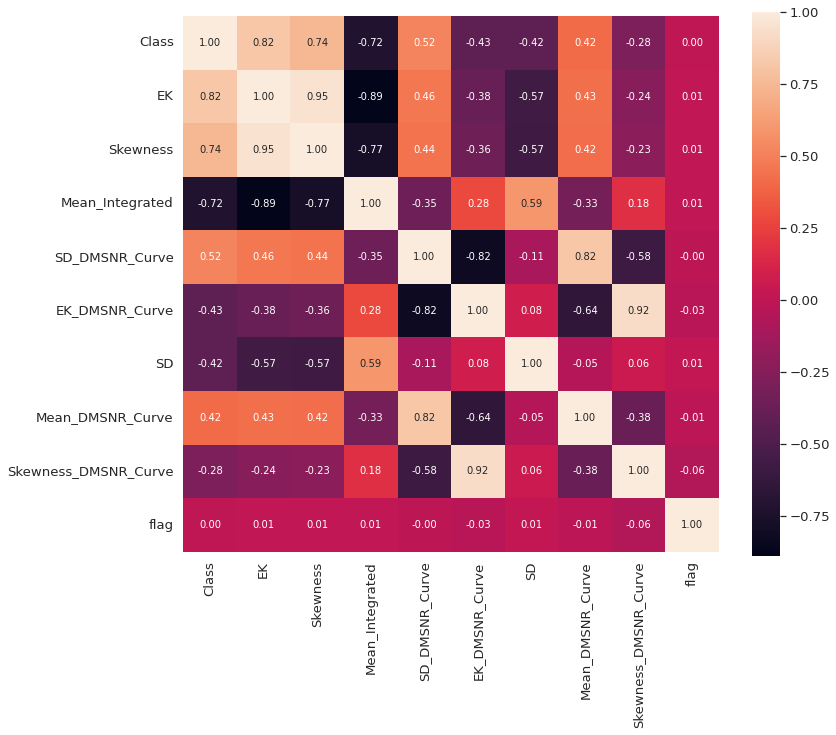

In [ ]:
TARGET = "Class"
k = 15 # number of variables for heatmap
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [ ]:
y = train_df[TARGET]
X = train_df.drop(TARGET,axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
xgb_params = {
        'objective': 'binary:logistic',
        'seed':42,
        'n_estimators':20000,
        'learning_rate':0.1,
        
        }
model_xgb = xgb.XGBClassifier(**xgb_params)
model_xgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              early_stopping_rounds=100,
              verbose=100)
log_loss(model_xgb.predict(X_valid),y_valid)

[0]	validation_0-logloss:0.60263	validation_1-logloss:0.60293
[100]	validation_0-logloss:0.02837	validation_1-logloss:0.03527
[200]	validation_0-logloss:0.01915	validation_1-logloss:0.02738
[300]	validation_0-logloss:0.01380	validation_1-logloss:0.02338
[400]	validation_0-logloss:0.00996	validation_1-logloss:0.02090
[500]	validation_0-logloss:0.00740	validation_1-logloss:0.01944
[600]	validation_0-logloss:0.00586	validation_1-logloss:0.01864
[700]	validation_0-logloss:0.00458	validation_1-logloss:0.01808
[800]	validation_0-logloss:0.00381	validation_1-logloss:0.01785
[900]	validation_0-logloss:0.00318	validation_1-logloss:0.01788
[1000]	validation_0-logloss:0.00263	validation_1-logloss:0.01788
[1049]	validation_0-logloss:0.00244	validation_1-logloss:0.01797


0.12192791128532479

In [ ]:
lgb_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'learning_rate':0.1,
        'task': 'train', 
        'seed':42,
        'n_estimators':20000,
        
}
model_lgb = lgb.LGBMClassifier(**lgb_params)
model_lgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=100)
log_loss(model_lgb.predict(X_valid),y_valid)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0229865	valid_1's binary_logloss: 0.0315708
[200]	training's binary_logloss: 0.01298	valid_1's binary_logloss: 0.0240211
[300]	training's binary_logloss: 0.00795539	valid_1's binary_logloss: 0.0211873
[400]	training's binary_logloss: 0.00509723	valid_1's binary_logloss: 0.0199718
[500]	training's binary_logloss: 0.00329327	valid_1's binary_logloss: 0.0196083
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00345154	valid_1's binary_logloss: 0.0195432


0.13367999912005488